In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline

In [50]:
presc = pd.read_csv('data_prep/antiallergic_V2.csv.gz', compression='gzip')
wards = pd.read_csv('data_prep/Wards.csv')

In [51]:
presc.head(n=3)

,Dosage_ratio,LSOA_CODE,Patient_count,Total_prescriptions,YYYYMM
0,2.997208,E01009300,2007.0,5.637636,201901
1,0.134755,E01014080,1470.0,0.654427,201901
2,1.020041,E01014081,1526.0,2.722545,201901


(1.3862943611198906, 9.876886870738948, 7.456454555176209, 7.489198154895406, 0.24744929561241027)


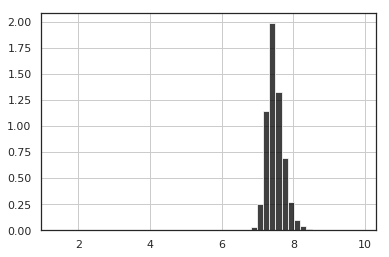

In [52]:
# the histogram of the data
data = np.log(presc['Patient_count'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

(1.0582906489438259e-05, 53187.32525852269, 1.1946720399085642, 43.992161223535504, 328.15214803795004)


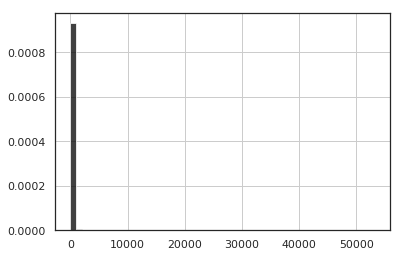

In [53]:
# the histogram of the data
data = (presc['Dosage_ratio'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

(5.291453244719129e-05, 241.33128950481486, 3.462494953995324, 4.691165336249037, 4.358827328563607)


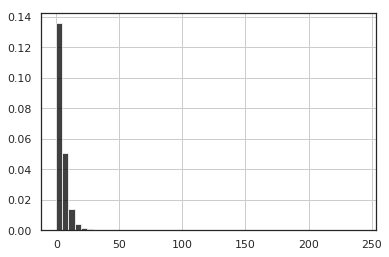

In [54]:
# the histogram of the data
data = (presc['Total_prescriptions'])
n, bins, patches = plt.hist(data , 50, density=True, facecolor='black', alpha=0.75)
print(np.min(data), np.max(data) ,  np.median(data), np.mean(data), np.std(data))
plt.grid(True)
plt.show()

In [55]:
wards.head(n=3)

,Unnamed: 0,LSOA11CD,WD15CD,WD15NM,LAD15CD,LocalAuthorityName,CityName
0,0,E01000104,E05000041,Village,E09000002,Barking and Dagenham,London
1,1,E01000105,E05000041,Village,E09000002,Barking and Dagenham,London
2,2,E01000106,E05000041,Village,E09000002,Barking and Dagenham,London


In [56]:
london_LSOAs = wards[wards['CityName'] == 'London']

In [57]:
London_preac = presc[presc['LSOA_CODE'].isin(london_LSOAs['LSOA11CD'])]

In [58]:
London_preac.sort_values(by=['YYYYMM'],inplace=True)

/10TBdrive/sagarj/anaconda3/envs/env_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
area_dict = {'YYYYMM':[], 'mean_count':[] , 'mean_dosage' : []}
for name , group in London_preac.groupby('YYYYMM'):
    area_dict['YYYYMM'].append(name)
    area_dict['mean_count'].append((np.sum(group['Total_prescriptions'])/np.sum(group['Patient_count'])))
    area_dict['mean_dosage'].append((np.sum(group['Dosage_ratio'])/np.sum(group['Patient_count'])))
area_df = pd.DataFrame.from_dict(area_dict)
area_df.sort_values(by=['YYYYMM'],inplace=True)

([<matplotlib.axis.XTick at 0x7f35d15a6310>,
 <a list of 74 Text xticklabel objects>)

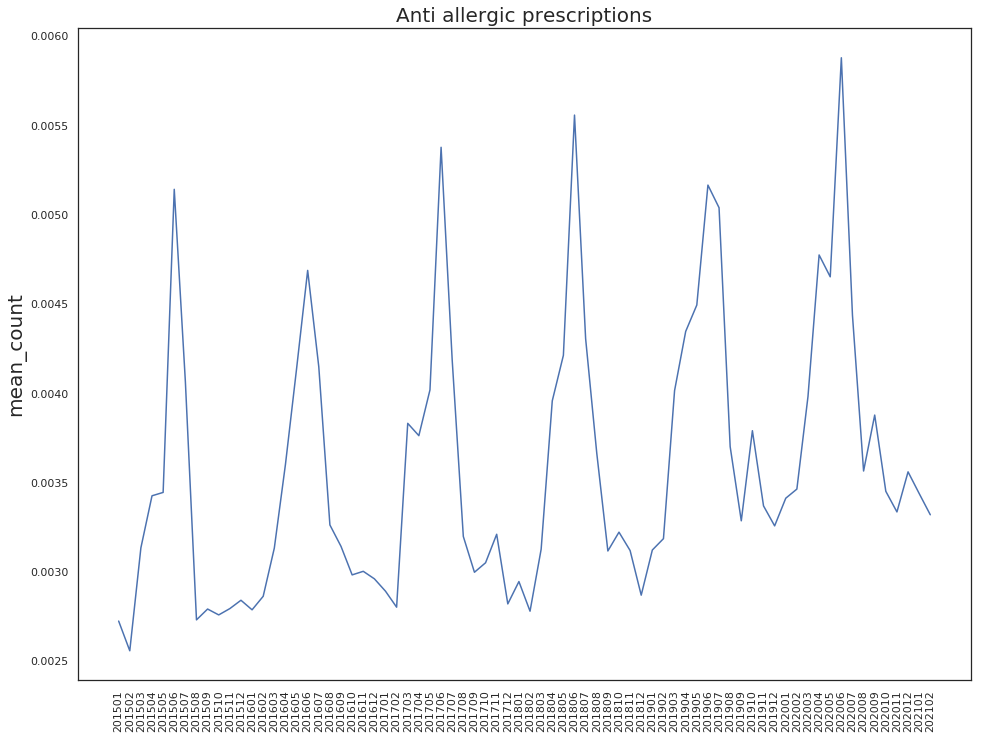

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.set_style("white")
plt.title("Anti allergic prescriptions",fontsize=20)
plt.ylabel("Prescriptions per capita",fontsize=20)
sns.lineplot(y=area_df['mean_count'],x=np.arange(0,len(area_df),1))
# sns.lineplot(y=area_df['mean_dosage'],x=np.arange(0,len(area_df),1))
plt.xticks(np.arange(0,len(area_df),1),area_df['YYYYMM'],rotation=90)